In [81]:
import mne
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import _cov
import scipy
from sklearn.utils import shuffle
import scipy.linalg

In [6]:
sub_id = "01"
data_dir = f"data/things/sub-{sub_id}/eeg"
tsv_df = pd.read_csv(f"{data_dir}/sub-{sub_id}_task-rsvp_events.tsv", sep="\t")
csv_df = pd.read_csv(f"{data_dir}/sub-{sub_id}_task-rsvp_events.csv")

In [5]:
tsv_df.head()

,onset,duration,eventnumber,objectnumber,object,sequencenumber,presentationnumber,blocksequencenumber,withinsequencenumber,stimnumber,stim,istarget,stimname,response,rt,correct,time_stimon,time_stimoff,stimdur
0,10724,50,0,275,carousel,0,0,0,0,10,stimuli\carousel\carousel_11s.jpg,0,carousel_11s.jpg,0,0.0,0,61.552560,61.602540,0.049980
1,10824,50,1,1165,piano,0,1,0,0,4,stimuli\piano\piano_05n.jpg,0,piano_05n.jpg,0,0.0,0,61.652560,61.702538,0.049977
2,10924,50,2,1735,turntable,0,2,0,0,11,stimuli\turntable\turntable_12s.jpg,0,turntable_12s.jpg,0,0.0,0,61.752561,61.802545,0.049984
3,11024,50,3,1643,tent,0,3,0,0,7,stimuli\tent\tent_08n.jpg,0,tent_08n.jpg,0,0.0,0,61.852564,61.902516,0.049951
4,11124,50,4,1564,stove2,0,4,0,0,8,stimuli\stove2\stove2_09s.jpg,0,stove2_09s.jpg,0,0.0,0,61.952542,62.002516,0.049974


In [7]:
csv_df.head()

,eventnumber,objectnumber,object,sequencenumber,presentationnumber,blocksequencenumber,withinsequencenumber,stimnumber,stim,istarget,stimname,response,rt,correct,time_stimon,time_stimoff,stimdur
0,0,275,carousel,0,0,0,0,10,stimuli\carousel\carousel_11s.jpg,0,carousel_11s.jpg,0.0,0.0,0.0,61.552560,61.602540,0.049980
1,1,1165,piano,0,1,0,0,4,stimuli\piano\piano_05n.jpg,0,piano_05n.jpg,0.0,0.0,0.0,61.652560,61.702538,0.049977
2,2,1735,turntable,0,2,0,0,11,stimuli\turntable\turntable_12s.jpg,0,turntable_12s.jpg,0.0,0.0,0.0,61.752561,61.802545,0.049984
3,3,1643,tent,0,3,0,0,7,stimuli\tent\tent_08n.jpg,0,tent_08n.jpg,0.0,0.0,0.0,61.852564,61.902516,0.049951
4,4,1564,stove2,0,4,0,0,8,stimuli\stove2\stove2_09s.jpg,0,stove2_09s.jpg,0.0,0.0,0.0,61.952542,62.002516,0.049974


In [83]:
chan_order = ['Fp1', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3',
                  'F1', 'F2', 'F4', 'F6', 'F8', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1',
                  'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T7', 'C5', 'C3', 'C1',
                  'Fz', 'C2', 'C4', 'C6', 'T8', 'TP9', 'TP7', 'CP5', 'CP3', 'CP1',
                  'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P7', 'P5', 'P3', 'P1',
                  'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8',
                  'O1', 'Oz', 'O2']
n_channels = len(chan_order)



In [70]:
brainvision_vhdr_fpath = f"{data_dir}/sub-{sub_id}_task-rsvp_eeg.vhdr"
raw = mne.io.read_raw_brainvision(brainvision_vhdr_fpath, preload=True, verbose=False)

print("\n--- Raw Object Information ---")
print(raw.info) # This gives a summary of the recording (channels, sfreq, etc.)

print(f"\nNumber of channels: {len(raw.ch_names)}")
print(f"First 10 channel names: {raw.ch_names[:10]}")
print(f"Sampling frequency: {raw.info['sfreq']} Hz")
print(f"Total duration of recording: {raw.n_times / raw.info['sfreq']:.2f} seconds")

print("\n--- Events (Annotations) from .vmrk file ---")
print(raw.annotations)


--- Raw Object Information ---
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 63 EEG
 custom_ref_applied: False
 dig: 66 items (3 Cardinal, 63 EEG)
 highpass: 0.0 Hz
 lowpass: 280.0 Hz
 meas_date: 2019-02-22 14:39:19 UTC
 nchan: 63
 projs: []
 sfreq: 1000.0 Hz
>

Number of channels: 63
First 10 channel names: ['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9']
Sampling frequency: 1000.0 Hz
Total duration of recording: 3035.74 seconds

--- Events (Annotations) from .vmrk file ---
<Annotations | 44569 segments: Event/E 1 (22248), Event/E 2 (22248), ...>


In [74]:
raw.pick(chan_order)
print(f"Selected {len(raw.ch_names)} channels.")

l_freq = 0.1
h_freq = 100.0
raw.filter(l_freq=l_freq, h_freq=h_freq, fir_design='firwin', verbose=False)
print(f"Raw data filtered between {l_freq} Hz and {h_freq} Hz.")

Selected 63 channels.
Raw data filtered between 0.1 Hz and 100.0 Hz.


In [78]:
mne_custom_events = []
event_image_paths = []
# Use a consistent event ID for all image presentations for epoching purposes
image_presentation_event_id = 1
sfreq = raw.info['sfreq']
for index, row in tsv_df.iterrows():

    onset_sec = row['time_stimon']
    # Ensure correct path separators and join with dataset_root_dir
    relative_image_path = row['stimname'].replace('\\', os.sep)
    full_image_path = os.path.join(data_dir, relative_image_path)
    onset_sample = int(round(onset_sec * sfreq))

    # Create an event entry: [sample, 0, event_id]
    mne_custom_events.append([onset_sample, 0, image_presentation_event_id])
    event_image_paths.append(full_image_path)

mne_custom_events = np.array(mne_custom_events)

print(f"Processed {len(mne_custom_events)} events for epoching.")

Processed 22248 events for epoching.


In [87]:
mne_custom_events

array([[  61553,       0,       1],
       [  61653,       0,       1],
       [  61753,       0,       1],
       ...,
       [3073766,       0,       1],
       [3073866,       0,       1],
       [3073966,       0,       1]], shape=(22248, 3))

In [79]:
tmin = -0.2
tmax = 1.0
baseline_period = (-0.2, 0.0)

custom_event_id_dict = {'image_presentation': image_presentation_event_id}

epochs = mne.Epochs(raw,
                    events=mne_custom_events,
                    event_id=custom_event_id_dict,
                    tmin=tmin,
                    tmax=tmax,
                    baseline=baseline_period, # Apply baseline correction
                    preload=True, # Load all epoch data into memory
                    verbose=True)
if hasattr(epochs, 'selection'):
    valid_event_image_paths = [event_image_paths[i] for i in epochs.selection]
else:
    valid_event_image_paths = event_image_paths[:len(epochs)]
print(f"Created {len(epochs)} epochs. Each epoch spans from {tmin*1000}ms to {tmax*1000}ms.")

Not setting metadata
22248 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 22248 events and 1201 original time points ...
336 bad epochs dropped
Created 21912 epochs. Each epoch spans from -200.0ms to 1000.0ms.


In [80]:
target_sfreq = 250.0
epochs.resample(sfreq=target_sfreq, verbose=False)
print(f"Epochs downsampled to {epochs.info['sfreq']} Hz.")

Epochs downsampled to 250.0 Hz.


In [84]:
baseline_data = epochs.copy().crop(tmin=None, tmax=0, include_tmax=False).get_data()
pooled_baseline_data = baseline_data.transpose(1, 0, 2).reshape(n_channels, -1)
noise_cov_matrix = np.cov(pooled_baseline_data)

epsilon = 1e-6 # Regularization parameter, adjust if needed
noise_cov_matrix_reg = noise_cov_matrix + epsilon * np.eye(n_channels)

try:
    eigenvalues, eigenvectors = np.linalg.eigh(noise_cov_matrix_reg)
    inv_sqrt_diag_eigenvalues = np.diag(1.0 / np.sqrt(eigenvalues))
    whitening_matrix = eigenvectors @ inv_sqrt_diag_eigenvalues @ eigenvectors.T
    print("Whitening matrix computed.")
except np.linalg.LinAlgError:
    print("Error computing whitening matrix (possibly singular covariance). Consider increasing epsilon or checking data.")
    # Fallback: use pseudo-inverse if direct inversion fails, or skip whitening
    # For simplicity, we'll proceed, but in practice, this needs robust handling.
    whitening_matrix = np.eye(n_channels)

post_stimulus_data = epochs.copy().crop(tmin=0, tmax=None, include_tmax=True).get_data()

whitened_post_stimulus_data = np.zeros_like(post_stimulus_data)
for i in range(post_stimulus_data.shape[0]):
    trial_data = post_stimulus_data[i, :, :] # (n_channels, n_post_stim_samples)
    whitened_trial_data = whitening_matrix @ trial_data
    whitened_post_stimulus_data[i, :, :] = whitened_trial_data

print(f"Applied Multivariate Noise Normalization. Shape of whitened data: {whitened_post_stimulus_data.shape}")

Whitening matrix computed.
Applied Multivariate Noise Normalization. Shape of whitened data: (21912, 63, 250)


In [85]:
training_dataset = []
if len(whitened_post_stimulus_data) == len(valid_event_image_paths):
    for i in range(len(whitened_post_stimulus_data)):
        eeg_segment_processed = whitened_post_stimulus_data[i] # (n_channels, n_timesamples_after_processing)
        image_path = valid_event_image_paths[i]

        training_dataset.append({
            'eeg_data': eeg_segment_processed, # This is the fully preprocessed EEG
            'image_path': image_path,
            'subject_id': sub_id,
            # Add more metadata if needed, e.g., from tsv_df
            # 'object_number': tsv_df.iloc[epochs.selection[i]]['objectnumber'] # if epochs.selection was used
        })
    print(f"\nCreated a training dataset with {len(training_dataset)} preprocessed EEG-image pairs.")
else:
    print("\nWarning: Mismatch between number of processed epochs and image paths. Dataset not created.")


Created a training dataset with 21912 preprocessed EEG-image pairs.


In [13]:
events_array, event_id_dict = mne.events_from_annotations(raw)

print("\nMNE Events Array (first 5 events):")
print(events_array[:5])

print("\nEvent ID Dictionary (mapping marker descriptions to integers):")
print(event_id_dict)

Used Annotations descriptions: [np.str_('Event/E  1'), np.str_('Event/E  2'), np.str_('Event/E  3'), np.str_('New Segment/')]

MNE Events Array (first 5 events):
[[    0     0 99999]
 [ 9724     0 10003]
 [10723     0 10001]
 [10773     0 10002]
 [10823     0 10001]]

Event ID Dictionary (mapping marker descriptions to integers):
{np.str_('Event/E  1'): 10001, np.str_('Event/E  2'): 10002, np.str_('Event/E  3'): 10003, np.str_('New Segment/'): 99999}


In [17]:
# First, let's make sure we have at least 15 EEG channels.
# Get all EEG channel indices
eeg_picks = mne.pick_types(raw.info, eeg=True, meg=False, stim=False, eog=False, exclude='bads')

# If there are fewer than 15 good EEG channels, take all of them.
num_channels_to_plot = min(15, len(eeg_picks))

# Select the first N good EEG channels
selected_channels_idx = eeg_picks[:num_channels_to_plot]
selected_channel_names = [raw.ch_names[i] for i in selected_channels_idx]

# Define the time range (e.g., first second of data)
start_sample = 0
end_sample = int(1 * raw.info['sfreq']) # 1 second of data

eeg_data_array = raw.get_data(picks=selected_channels_idx, start=start_sample, stop=end_sample)
print(f"Shape of extracted data: {eeg_data_array.shape} (channels x samples)")

Shape of extracted data: (15, 1000) (channels x samples)


<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
/var/folders/6n/sm2tfzkn2hjd8cpfn_256ph00000gp/T/ipykernel_41746/370815723.py:22: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel("Amplitude ($\mu V$)")


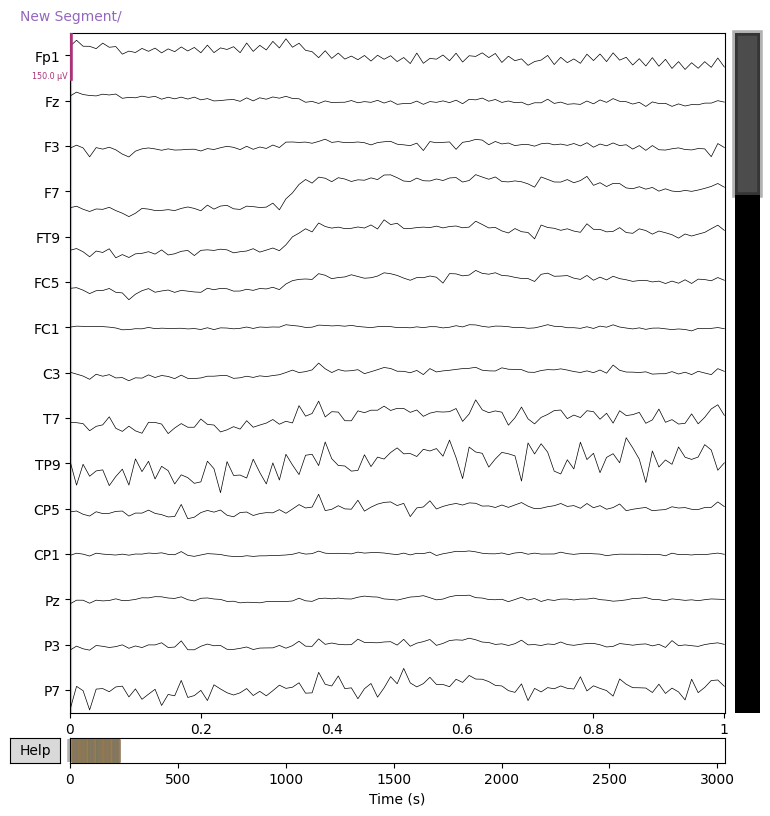

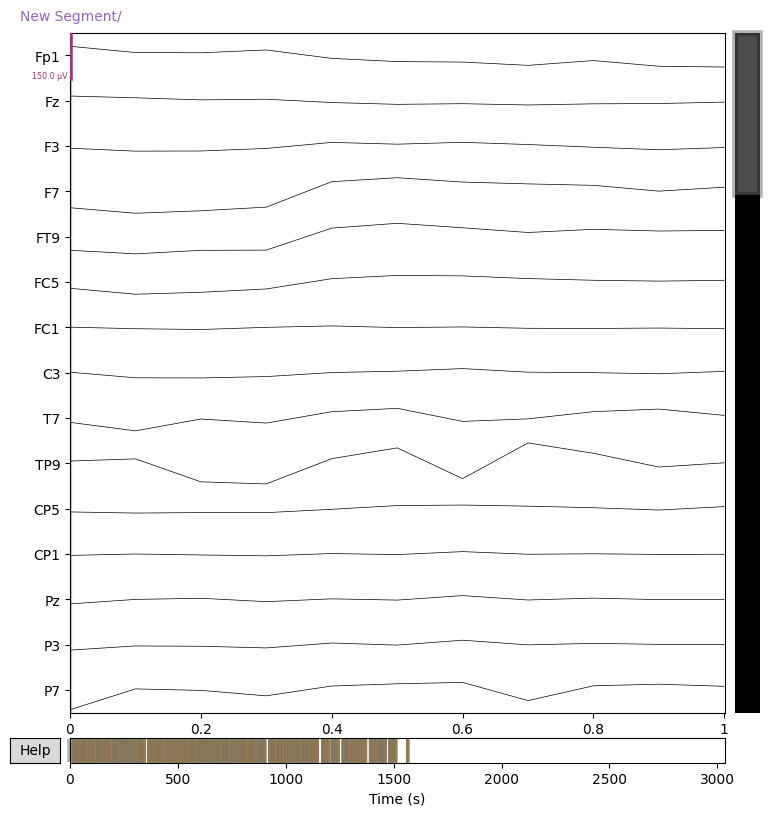

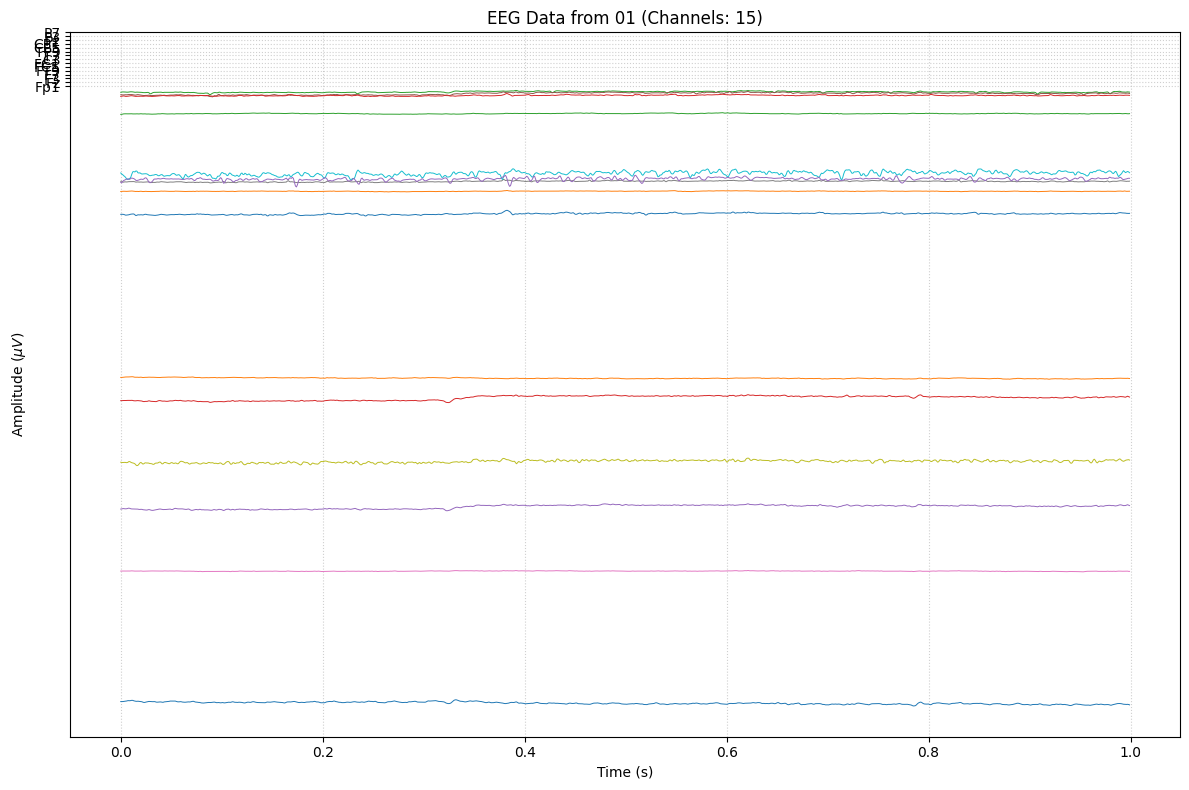

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))

# Basic plotting: offset each channel by some amount for visibility
# You'll need to determine a suitable scaling for visualization
# 75e-6 V = 75 uV. Let's convert the data to uV for plotting.
scaling_factor_uV = 75 # For visual separation, roughly corresponds to 75 uV

# Offset each channel to prevent overlap
channel_offset = np.arange(num_channels_to_plot) * scaling_factor_uV

# Convert data to uV for better interpretation of scaling
eeg_data_array_uV = eeg_data_array * 1e6 # Convert Volts to microvolts

# Create a time vector for plotting
time_vector = np.arange(eeg_data_array_uV.shape[1]) / raw.info['sfreq']

for i in range(num_channels_to_plot):
    ax.plot(time_vector, eeg_data_array_uV[i, :] + channel_offset[i], 
            label=selected_channel_names[i], linewidth=0.7)

ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude ($\mu V$)")
ax.set_title(f"EEG Data from {sub_id} (Channels: {num_channels_to_plot})")
ax.set_yticks(channel_offset) # Set ticks at the offset positions
ax.set_yticklabels(selected_channel_names) # Label with channel names
ax.grid(True, linestyle=':', alpha=0.6)
# ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0)) # Use if you want a legend

plt.tight_layout()
plt.show()

In [30]:
len(chan_order)

63

In [36]:
 set(chan_order) - set(raw.ch_names)

{'Cz'}

In [ ]:

chan_order = ['Fp1', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3',
                  'F1', 'F2', 'F4', 'F6', 'F8', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1',
                  'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T7', 'C5', 'C3', 'C1',
                  'Fz', 'C2', 'C4', 'C6', 'T8', 'TP9', 'TP7', 'CP5', 'CP3', 'CP1',
                  'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P7', 'P5', 'P3', 'P1',
                  'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8',
                  'O1', 'Oz', 'O2']

brainvision_vhdr_fpath = f"{data_dir}/sub-{sub_id}_task-rsvp_eeg.vhdr"
raw = mne.io.read_raw_brainvision(brainvision_vhdr_fpath, preload=True, verbose=False)
raw.pick_channels(chan_order, ordered=True, verbose=False)

<RawBrainVision | sub-01_task-rsvp_eeg.eeg, 63 x 3035740 (3035.7 s), ~1.43 GiB, data loaded>

In [40]:
sfreq_raw = raw.info['sfreq']
print(f"Raw data loaded. Sampling frequency: {sfreq_raw} Hz.")

events, event_id_dict = mne.events_from_annotations(raw, verbose=False)
print(f"Found {len(events)} events in this session.")

Raw data loaded. Sampling frequency: 1000.0 Hz.
Found 44569 events in this session.


In [55]:
events

array([[      0,       0,   99999],
       [   9724,       0,   10003],
       [  10723,       0,   10001],
       ...,
       [3023076,       0,   10002],
       [3023126,       0,   10001],
       [3023176,       0,   10002]], shape=(44569, 3))

In [41]:
target_event_code_val = 99999
actual_target_event_id = None
for desc, val in event_id_dict.items():
    if str(target_event_code_val) == desc or (str(target_event_code_val) in desc and len(desc) > len(str(target_event_code_val))):
        actual_target_event_id = val
        break
    if isinstance(desc, int) and desc == target_event_code_val:
        actual_target_event_id = val
        break
        
if actual_target_event_id is not None:
    idx_target = np.where(events[:,2] == actual_target_event_id)[0]
    if len(idx_target) > 0:
        events = np.delete(events, idx_target, 0)
        print(f"Rejected {len(idx_target)} target trials (event {actual_target_event_id}) in this session.")
    else:
        print(f"No target trials (event {actual_target_event_id}) found to reject in this session.")
else:
    print(f"Warning: Target event code {target_event_code_val} not found in event_id_dict for this session. No target trials rejected.")

In [42]:
sfreq = 100

print(f"Epoching data with tmin={-0.2}s, tmax={1.0}s, baseline=(None,0).")
epochs = mne.Epochs(raw, events, tmin=-0.2, tmax=1.0, baseline=(None,0),
                    preload=True, verbose=False)
del raw # Free up memory
print(f"Created {len(epochs)} epochs in this session.")

# Resampling
if sfreq < sfreq_raw: # Only resample if target sfreq is lower
    print(f"Resampling epochs from {sfreq_raw} Hz to {sfreq} Hz.")
    epochs.resample(sfreq, verbose=False)
else:
    print(f"Skipping resampling as target sfreq ({sfreq} Hz) is not lower than epoch sfreq ({sfreq_raw} Hz).")
    
times = epochs.times
print(f"Epochs shape after resampling: {epochs.get_data().shape}")

Epoching data with tmin=-0.2s, tmax=1.0s, baseline=(None,0).
Created 44568 epochs in this session.
Resampling epochs from 1000.0 Hz to 100 Hz.
Epochs shape after resampling: (44568, 63, 120)


In [43]:
data = epochs.get_data(verbose=False) # (n_epochs, n_channels, n_samples)
stim_events_in_epochs = epochs.events[:,2] # Get the stimulus IDs for each epoch
unique_img_conditions = np.unique(stim_events_in_epochs)
del epochs

In [44]:
data_part = 'train'
if data_part == 'test':
    max_rep = 20
else: # 'training'
    max_rep = 2

sorted_data = np.zeros((len(unique_img_conditions), max_rep, data.shape[1], data.shape[2]))

print(f"Sorting {data_part} data for {len(unique_img_conditions)} unique image conditions (max {max_rep} reps each)...")

Sorting train data for 3 unique image conditions (max 2 reps each)...


In [48]:
seed = 42
for i, img_cond_val in enumerate(unique_img_conditions):
    idx_for_cond = np.where(stim_events_in_epochs == img_cond_val)[0]
    
    if len(idx_for_cond) == 0:
        # print(f"Warning: No epochs found for image condition {img_cond_val} in this session. Skipping.")
        continue

    n_samples_to_take = min(max_rep, len(idx_for_cond))
    shuffled_idx = shuffle(idx_for_cond, random_state=seed, n_samples=n_samples_to_take)
    
    sorted_data[i, :n_samples_to_take] = data[shuffled_idx]

del data # Free up memory

epoched_data_sliced = sorted_data[:, :, :, 50:]
times_sliced = times[50:]

print(f"Finished epoching and sorting for {data_part}")

Finished epoching and sorting for train


In [54]:
print("\n--- Verifying Image Repetitions from a Sample Raw File ---")

# We need to temporarily load one raw file to get its event structure.
# This assumes the events structure (including target events) is consistent across sessions/runs.
# Let's load the first session's raw file to inspect its events.


try:
    # Load raw data without preloading (just for event inspection) to save memory/time
    temp_raw = mne.io.read_raw_brainvision(brainvision_vhdr_fpath, preload=False, verbose=False)
    
    # Get events from raw.annotations for the temporary raw object
    temp_events_full, temp_event_id_dict_full = mne.events_from_annotations(temp_raw, verbose=False)
    
    # Apply target trial rejection logic *just like* in the epoching_and_sort function
    target_event_code_val = 99999
    actual_target_event_id = None
    for desc, val in temp_event_id_dict_full.items():
        if str(target_event_code_val) == desc or (str(target_event_code_val) in desc and len(desc) > len(str(target_event_code_val))):
            actual_target_event_id = val
            break
        if isinstance(desc, int) and desc == target_event_code_val:
            actual_target_event_id = val
            break
            
    if actual_target_event_id is not None:
        idx_target = np.where(temp_events_full[:,2] == actual_target_event_id)[0]
        if len(idx_target) > 0:
            events_cleaned_for_verification = np.delete(temp_events_full, idx_target, 0)
            print(f"Temporarily rejected {len(idx_target)} target trials for verification.")
        else:
            events_cleaned_for_verification = temp_events_full.copy()
            print(f"No target trials found in temp raw data for verification.")
    else:
        events_cleaned_for_verification = temp_events_full.copy()
        print(f"Warning: Target event code {target_event_code_val} not found in temp raw data for verification. All events used.")
        
    del temp_raw # Release memory

    stimulus_ids = events_cleaned_for_verification[:, 2]

    # Count occurrences of each unique stimulus ID
    unique_stim_ids, counts = np.unique(stimulus_ids, return_counts=True)

    print(f"Total unique stimulus IDs found: {len(unique_stim_ids)}")
    print(f"Total stimulus events (epochs) remaining after target rejection in this sample: {len(stimulus_ids)}")

    print("\nRepetitions per Unique Stimulus ID (first 20, or all if fewer):")
    sorted_indices = np.argsort(unique_stim_ids)
    for i in sorted_indices[:20]:
        stim_id = unique_stim_ids[i]
        count = counts[i]
        print(f"  Stimulus ID {stim_id}: {count} repetitions")

    print(f"\nRepetition counts summary:")
    print(f"  Minimum repetitions for any image: {np.min(counts)}")
    print(f"  Maximum repetitions for any image: {np.max(counts)}")
    print(f"  Average repetitions per image: {np.mean(counts):.2f}")
    print(f"  Standard deviation of repetitions: {np.std(counts):.2f}")

except:
    raise 


--- Verifying Image Repetitions from a Sample Raw File ---
Total unique stimulus IDs found: 4
Total stimulus events (epochs) remaining after target rejection in this sample: 44569

Repetitions per Unique Stimulus ID (first 20, or all if fewer):
  Stimulus ID 10001: 22248 repetitions
  Stimulus ID 10002: 22248 repetitions
  Stimulus ID 10003: 72 repetitions
  Stimulus ID 99999: 1 repetitions

Repetition counts summary:
  Minimum repetitions for any image: 1
  Maximum repetitions for any image: 22248
  Average repetitions per image: 11142.25
  Standard deviation of repetitions: 11105.78
